# Problem Statement

## The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
#####  The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

#####  Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



## Attribute Information:

#####  The explanations of sensor measurements and their brief statistics are given below.

#####  Variable (Abbr.) Unit Min Max Mean
#####  Ambient temperature (AT) C â€“6.23 37.10 17.71
#####  Ambient pressure (AP) mbar 985.85 1036.56 1013.07
#####  Ambient humidity (AH) (%) 24.08 100.20 77.87
#####  Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
#####  Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
#####  Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
#####  Turbine after temperature (TAT) C 511.04 550.61 546.16
#####  Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
#####  Turbine energy yield (TEY) MWH 100.02 179.50 133.51
#####  Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
#####  Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import tensorflow as ts
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Neural%20Networks/gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

# Spliting into train,test

In [6]:
x = df.drop(columns='TEY')
y = df['TEY']

In [7]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=143)

In [10]:
ann = Sequential()

ann.add(Dense(units=30,activation='sigmoid'))
ann.add(Dense(units=20,activation='relu'))

ann.add(Dense(units=1))

ann.compile(optimizer='adam',loss='mse')
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
376/376 [==============================] - 2s 3ms/step - loss: 13488.1533 - val_loss: 6355.6396
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 1828.1329 - val_loss: 61.4475
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 13.6374 - val_loss: 2.6793
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 2.4928 - val_loss: 1.6702
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 1.8370 - val_loss: 1.3534
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 1.5203 - val_loss: 1.1680
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 1.3227 - val_loss: 1.0544
Epoch 8/50
376/376 [==============================] - 1s 3ms/step - loss: 1.1907 - val_loss: 0.9783
Epoch 9/50
376/376 [==============================] - 1s 4ms/step - loss: 1.0934 - val_loss: 0.9248
Epoch 10/50
376/376 [==============================] - 1s 3ms/step - loss: 1.0193 - val_

<Axes: >

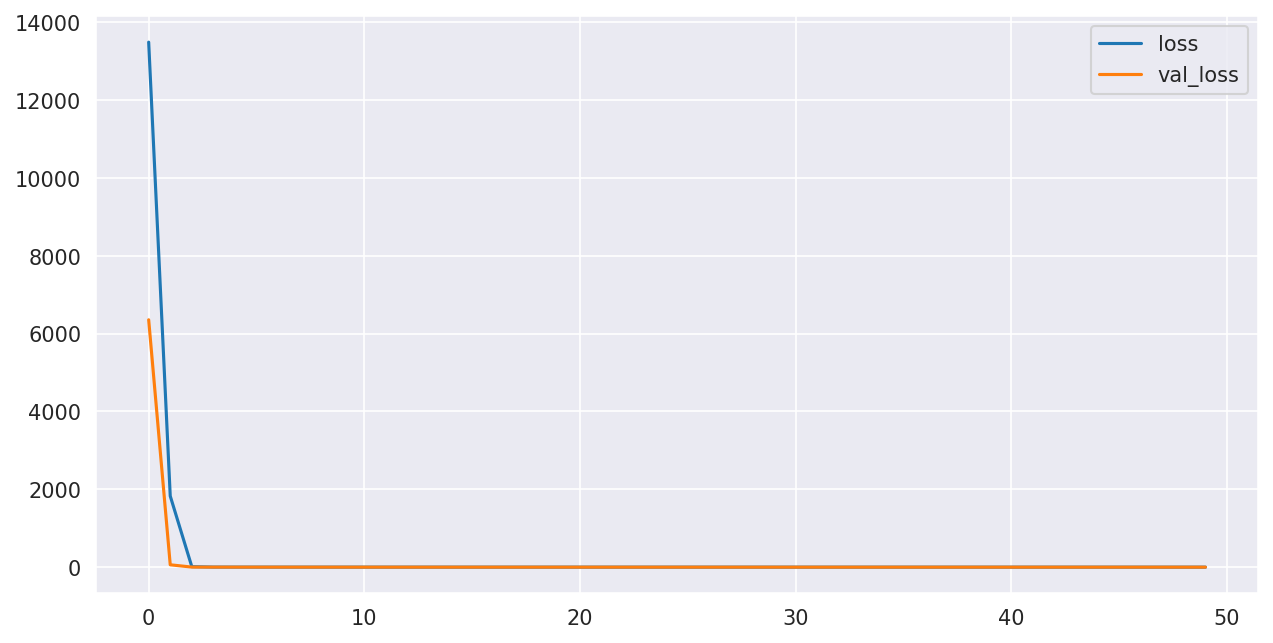

In [11]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [12]:
ypred = ann.predict(xtest)
ypred

94/94 [==============================] - 0s 1ms/step


array([[133.95856],
       [132.7866 ],
       [131.9789 ],
       ...,
       [111.95702],
       [147.75235],
       [153.91872]], dtype=float32)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(ytest,ypred)

0.9979930248230302